Decided to use PyTorch. Keras was giving me quite a headache with it's abstractions.

In [5]:
import torch

from torch.utils.data import Dataset, DataLoader

import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./lesion-csv.csv")
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")

# All we care about at this point is the id and class
train_df = train_df.drop(["Unnamed: 0", "Unnamed: 0.1", "teethNumbers", "description", "numberOfCanals", "date", "sequenceNumber"], axis=1)
test_df = test_df.drop(["Unnamed: 0", "Unnamed: 0.1", "teethNumbers", "description", "numberOfCanals", "date", "sequenceNumber"], axis=1)

partition = {
    "train": train_df.imageId.values,
    "validation": test_df.imageId.values,
}

In [3]:
n = 65
print(train_df.iloc[n, 0])
print(train_df.iloc[n].imageId)

0130-1
0130-1


In [8]:
class TeethLesionDataset(Dataset):
    """Teeth Lesion dataset."""
    
    def __init__(self, train_frame, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with image ids and labels.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.lesions_train_frame = train_frame
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.lesions_train_frame)
    
    def __getitem__(self, idx):
        image_id = self.lesions_train_frame.iloc[idx].imageId
        image = cv2.imread(self.root_dir + image_id + '.jpg')
        
        sample = { 'image': image }
        
        if self.transform:
            sample = self.transform(sample)
        
        return sample

0 (1708, 1708, 3)
1 (1708, 1708, 3)
2 (1708, 1708, 3)
3 (1708, 1708, 3)


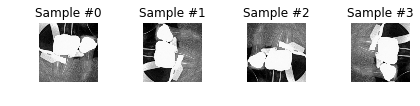

In [11]:
lesion_dataset = TeethLesionDataset(train_df, './lesion_images/all_images_processed/')

fig = plt.figure()

for i in range(len(lesion_dataset)):
    sample = lesion_dataset[i]
    
    print(i, sample['image'].shape)
    
    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    plt.imshow(sample['image'])

    if i == 3:
        plt.show()
        break